<a href="https://colab.research.google.com/github/cris9005/100-Days-Of-ML-Code/blob/master/Final_NLP_Martinez_Cristina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=68a48c96d79997c8e783277c848fae2010e08d573e8376b3b9a95942c660bd29
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


In [2]:
!pip install extraction

In [3]:
import os
import docx2txt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
import networkx as nx

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import MDS

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold


from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora

from gensim.models.doc2vec import Doc2Vec, TaggedDocument



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import MDS


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

import pandas as pd
import os

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora


from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import numpy as np

In [6]:
!pip install pronto


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 977.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00


In [7]:
import progressbar
from pronto import Ontology
from spacy.tokens import Doc, Span, Token
from spacy.matcher import PhraseMatcher
from spacy.util import filter_spans

In [8]:
import string
from nltk.corpus import stopwords


In [9]:
#pandas parameters
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [10]:
pip install wordcloud

In [ ]:
pip install url-normalize

In [ ]:
#set working directory
os.chdir('/content/News')

#function to retreive and turn document into text
def retrieve_DSI(file_name):
    file_name=str(file_name)
    text = docx2txt.process(file_name)
    return text

#Lists to store file name and body of text
file_name=[]
text=[]

#for loop to iterate through documents in working directory
for file in os.listdir('.'):
    #if statment to not attempt to open non word documents
    if file.endswith('.docx'):
        text_name=file
        #call function to obtain the text
        text_body=retrieve_DSI(file)
        #apped the file names and text to list
        file_name.append(text_name)
        text.append(text_body)
        #removed the variables used in the for loop
        del text_name, text_body, file

#create dictionary for corpus
corpus={'DSI_Title':file_name, 'Text': text}


#output a CSV with containing the class corpus along with titles of corpus.
#file saved in working directory.
pd.DataFrame(corpus).to_csv('Class Corpus.csv', index=file_name)


In [16]:
###############################################################################
### Function to process documents
###############################################################################
def clean_doc(doc):
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # word stemming
    # ps=PorterStemmer()
    # tokens=[ps.stem(word) for word in tokens]
    return tokens

#Processing text into lists

In [42]:
data=pd.read_csv('/content/Class Corpus Completed v1.csv', encoding='latin-1')

In [18]:
econdata=pd.read_csv('/content/Econnew.csv',encoding='latin-1')


In [19]:
relationsdata=pd.read_csv('/content/USrelations.csv', encoding='latin-1')


In [13]:
stop_words = set(stopwords.words('english'))


In [20]:
relationsdata.rename(columns={"ï»¿DSI_Title": "DSI_Title"}, inplace=True)
#relationsdata.info()
econdata.rename(columns={"ï»¿DSI_Title": "DSI_Title"}, inplace=True)


## Entire Corpus

In [17]:
###############################################################################
### Processing text into lists
###############################################################################

#set working Directory to where class corpus is saved.
#os.chdir('/content/News')


#read in class corpus csv into python
#data=pd.read_csv('/content/Class Corpus Completed v1.csv', encoding='latin-1')

#create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(data)):
    temp_text=data['DSI_Title'].iloc[i]
    titles.append(temp_text)

#create empty list to store text documents
text_body=[]

#for loop which appends the text to the text_body list
for i in range(0,len(data)):
    temp_text=data['Text'].iloc[i]
    text_body.append(temp_text)

#Note: the text_body is the unprocessed list of documents read directly form
#the csv.

#empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)

In [102]:
len(temp_text)

4594

In [28]:
#Note: the processed_text is the PROCESSED list of documents read directly form
#the csv.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)


#Econ and Relations Corpi

In [274]:
titles1=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(econdata)):
    temp_text=econdata['DSI_Title'].iloc[i]
    titles1.append(temp_text)

#create empty list to store text documents
text_body1=[]

#for loop which appends the text to the text_body list
for i in range(0,len(econdata)):
    temp_text=econdata['Text'].iloc[i]
    text_body1.append(temp_text)

#Note: the text_body is the unprocessed list of documents read directly form
#the csv.

#empty list to store processed documents
processed_text1=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text1.append(text)

In [276]:
#Note: the processed_text is the PROCESSED list of documents read directly form
#the csv.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text1=[]

for i in processed_text1:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text1.append(temp_DSI)

In [275]:
titles2=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(relationsdata)):
    temp_text=relationsdata['DSI_Title'].iloc[i]
    titles2.append(temp_text)

#create empty list to store text documents
text_body2=[]

#for loop which appends the text to the text_body list
for i in range(0,len(relationsdata)):
    temp_text=relationsdata['Text'].iloc[i]
    text_body2.append(temp_text)

#Note: the text_body is the unprocessed list of documents read directly form
#the csv.

#empty list to store processed documents
processed_text2=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text2.append(text)

In [277]:
#Note: the processed_text is the PROCESSED list of documents read directly form
#the csv.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text2=[]

for i in processed_text2:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text2.append(temp_DSI)

#Wordcloud

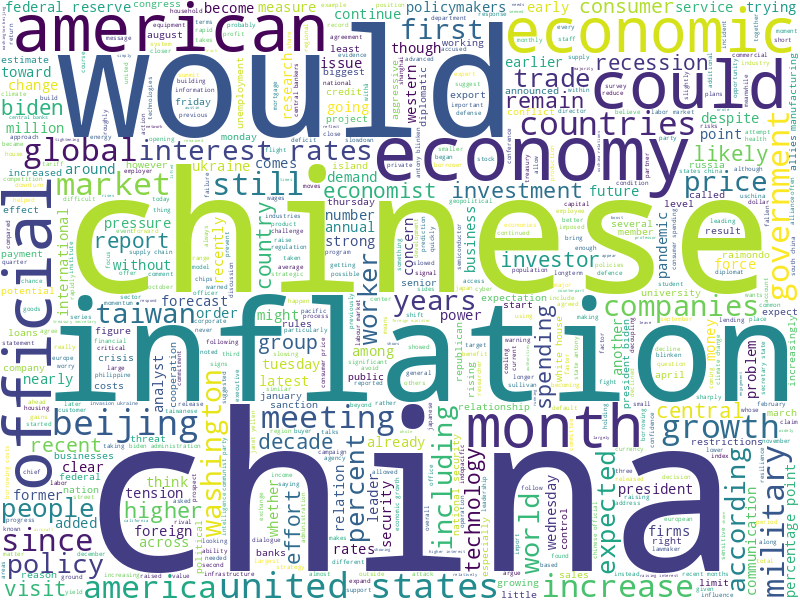

In [ ]:
# wordcloud
from wordcloud import WordCloud
final_processed_text_copy = final_processed_text.copy()
long_string = ','.join(final_processed_text_copy)
wordcloud = WordCloud(background_color="white",
                      width=800, height=600,
                      stopwords=stop_words,
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [104]:
# rerun stopwords to object
stop_words = set(stopwords.words('english'))
new_stopwords = ['would','since','still','first','could','month','recent','united','years','months','states'
                     ,'americans','america','american','americas','government',
                     'nations','national','nation','country','state','public','policy'] #remove repeating terms

new_stopwords= new_stopwords
stop_words = stop_words.union(new_stopwords)

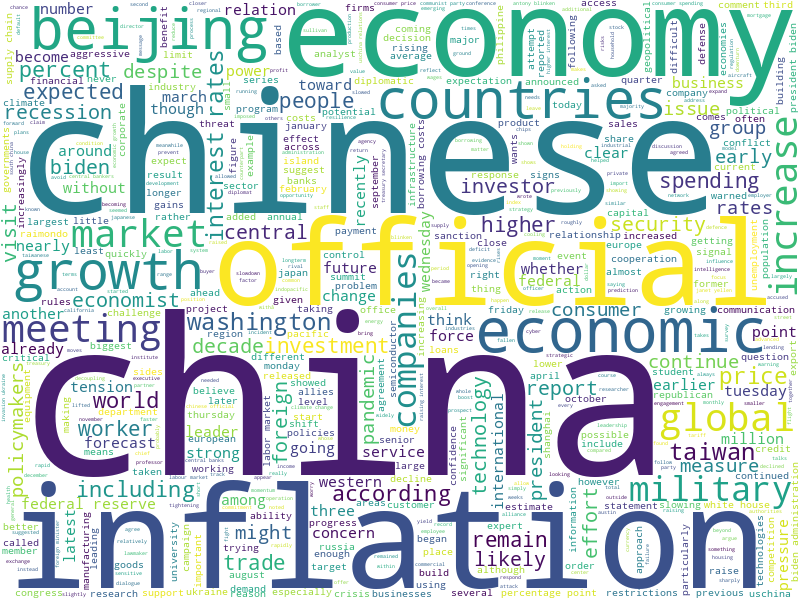

In [105]:
# wordcloud
from wordcloud import WordCloud
final_processed_text_copy = final_processed_text.copy()
long_string = ','.join(final_processed_text_copy)
wordcloud = WordCloud(background_color="white",
                      width=800, height=600,
                      stopwords=stop_words,
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

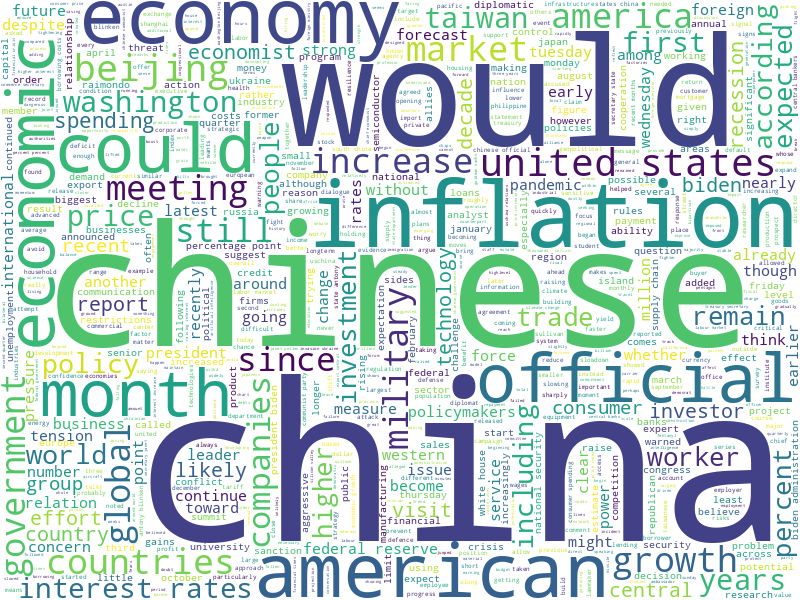

In [278]:
# wordcloud Econ Data
from wordcloud import WordCloud
final_processed_text_copy1 = final_processed_text1.copy()
long_string = ','.join(final_processed_text_copy1)
wordcloud = WordCloud(background_color="white",
                      width=800, height=600,
                      stopwords=stop_words,
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

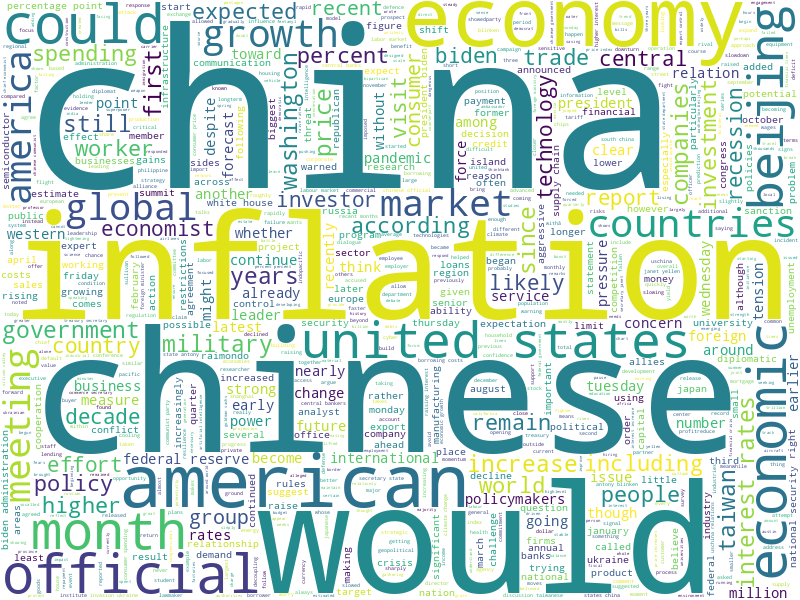

In [279]:
# wordcloud US Relations
from wordcloud import WordCloud
final_processed_text_copy2 = final_processed_text2.copy()
long_string = ','.join(final_processed_text_copy2)
wordcloud = WordCloud(background_color="white",
                      width=800, height=600,
                      stopwords=stop_words,
                      max_words=5000,
                      contour_width=3,
                      contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#Sklearn TFIDF

note the ngram_range will allow you to include multiple words within the TFIDF matrix

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Note: We stitched the processed text together so the TFIDF vectorizer can work.
#Final section of code has 3 lists used.  2 of which are used for further processing.
#(1) text_body - unused, (2) processed_text (used in W2V),
#(3) final_processed_text (used in TFIDF), and (4) DSI titles (used in TFIDF Matrix)

###############################################################################
### Sklearn TFIDF
###############################################################################
#note the ngram_range will allow you to include multiple words within the TFIDF matrix
#Call Tfidf Vectorizer
Tfidf=TfidfVectorizer(ngram_range=(1,3))

#fit the vectorizer using final processed documents.  The vectorizer requires the
#stiched back together document.

TFIDF_matrix=Tfidf.fit_transform(final_processed_text)

#creating datafram from TFIDF Matrix
matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names_out(), index=titles)



In [120]:
# Verify TFIDF_Matrix has been created.
matrix.shape
matrix.head()

aaron  aaron terrazas  aaron terrazas chief  abandon  abandon right  abandon right force  abandoned  abandoned ambassador  abandoned ambassador panama  abandoned departure  abandoned departure little  abandoned policy  abandoned policy lurching  abandoned strategy  abandoned strategy restraint  abandoned zerocovid  abandoned zerocovid policy  abandoning  abandoning probeijing  abandoning probeijing policies  abandoning seemingly  abandoning seemingly become  abated  \
(0, Link53.docx)    0.0             0.0                   0.0      0.0            0.0                  0.0   0.000000                   0.0                          0.0                  0.0                         0.0               0.0                        0.0                 0.0                           0.0             0.000000                    0.000000         0.0                    0.0                             0.0                   0.0                          0.0     0.0   
(0, Link15.docx)    0.0             0.0                   0.0      0.0            0.0                  0.0   0.031637                   0.0                          0.0                  0.0                         0.0               0.0                        0.0                 0.0                           0.0             0.039341                    0.039341         0.0                    0.0                             0.0                   0.0                          0.0     0.0   
(0, Link25.docx)    0.0             0.0                   0.0      0.0            0.0                  0.0   0.000000                   0.0                          0.0                  0.0                         0.0               0.0                        0.0                 0.0                           0.0             0.000000                    0.000000         0.0                    0.0                             0.0                   0.0                          0.0     0.0   
(0, Link30.docx)    0.0             0.0                   0.0      0.0            0.0                  0.0   0.000000                   0.0                          0.0                  0.0                         0.0               0.0                        0.0                 0.0                           0.0             0.000000                    0.000000         0.0                    0.0                             0.0                   0.0                          0.0     0.0   
(0, Link31.docx)    0.0             0.0                   0.0      0.0            0.0                  0.0   0.000000                   0.0                          0.0                  0.0                         0.0               0.0                        0.0                 0.0                           0.0             0.000000                    0.000000         0.0                    0.0                             0.0                   0.0                          0.0     0.0   

                  abated great  abated great resignation  abated history  abated history provide  abating  abating think  abating think turmoil  abbreviation  abbreviation mexico  abbreviation mexico customers  abdulla  abdulla shahid  abdulla shahid foreign  abiding  abiding commitmentsâ  abiding commitmentsâ steal  ability  ability another  ability another similar  ability attract  ability attract brightest  ability attract pandemic  ability bills  ability bills lawmakers  \
(0, Link53.docx)           0.0                       0.0             0.0                     0.0      0.0            0.0                    0.0           0.0                  0.0                            0.0      0.0             0.0                     0.0      0.0                   0.0                         0.0  0.00000              0.0                      0.0              0.0                        0.0                       0.0            0.0                      0.0   
(0, Link15.docx)           0.0                       0.0             0.0                     0.0      0.0  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Note: We stitched the processed text together so the TFIDF vectorizer can work.
#Final section of code has 3 lists used.  2 of which are used for further processing.
#(1) text_body - unused, (2) processed_text (used in W2V),
#(3) final_processed_text (used in TFIDF), and (4) DSI titles (used in TFIDF Matrix)

###############################################################################
### Sklearn TFIDF
###############################################################################
#note the ngram_range will allow you to include multiple words within the TFIDF matrix
#Call Tfidf Vectorizer
Tfidf=TfidfVectorizer(ngram_range=(1,3))

#fit the vectorizer using final processed documents.  The vectorizer requires the
#stiched back together document.

TFIDF_matrix1=Tfidf.fit_transform(final_processed_text1)

#creating datafram from TFIDF Matrix
matrix1=pd.DataFrame(TFIDF_matrix1.toarray(), columns=Tfidf.get_feature_names_out(), index=titles)


In [281]:
Tfidf=TfidfVectorizer(ngram_range=(1,3))

#fit the vectorizer using final processed documents.  The vectorizer requires the
#stiched back together document.

TFIDF_matrix2=Tfidf.fit_transform(final_processed_text2)

#creating datafram from TFIDF Matrix
matrix2=pd.DataFrame(TFIDF_matrix2.toarray(), columns=Tfidf.get_feature_names_out(), index=titles)

### Explore Frequent Terms

In [122]:
# Creating dataframe from CV Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,3))
final_processed_text_cv = final_processed_text.copy()
cv_matrix=cv.fit_transform(final_processed_text_cv)
cv_matrix=pd.DataFrame(cv_matrix.toarray(), columns=cv.get_feature_names_out(), index=titles)

In [123]:
# Trying few things out (Ali)

# Create transposed dataframe from CV Matrix
matrix_corp_t = matrix.transpose()
cv_matrix_corp_t = cv_matrix.transpose()

# Sum all the terms to create Term Frequency and Document Frequency for each term
cv_matrix_corp_t['df_corpus']= (cv_matrix_corp_t != 0).sum(axis=1)
cv_matrix_corp_t['tf_corpus']= cv_matrix_corp_t.sum(axis=1) - cv_matrix_corp_t['df_corpus']

# Remove uncessary columns from the dataframe after summing them
idx = np.r_[0:102]
cv_matrix_corp_t.drop(cv_matrix_corp_t.columns[idx], axis=1, inplace=True)

print("Top 10 Terms based on document frequency.")
print(cv_matrix_corp_t[['df_corpus']].nlargest(20, 'df_corpus'))
print("\n")
print("Top 10 Terms based on frequency.")
print(cv_matrix_corp_t[['tf_corpus']].nlargest(20, 'tf_corpus'))

Top 10 Terms based on document frequency.
            df_corpus
would             136
china             117
since             108
economic          102
officials         102
could             101
chinese            98
economy            94
years              90
first              88
months             82
still              82
month              81
government         80
policy             80
recent             80
united             80
interest           78
president          78
states             77


Top 10 Terms based on frequency.
               tf_corpus
china                684
chinese              475
inflation            274
would                272
economy              250
economic             229
rates                223
united               211
could                205
officials            205
states               198
beijing              197
growth               192
interest             189
united states        185
countries            167
since                167
american   

In [140]:
cv_matrix_corp_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, aaron to zurich january agreed
Data columns (total 100 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   (3, Link98.docx)   99982 non-null  int64
 1   (3, Link45.docx)   99982 non-null  int64
 2   (4, Link187.docx)  99982 non-null  int64
 3   (4, Link149.docx)  99982 non-null  int64
 4   (4, Link148.docx)  99982 non-null  int64
 5   (4, Link186.docx)  99982 non-null  int64
 6   (4, Link184.docx)  99982 non-null  int64
 7   (4, Link132.docx)  99982 non-null  int64
 8   (4, Link111.docx)  99982 non-null  int64
 9   (4, Link172.docx)  99982 non-null  int64
 10  (4, Link119.docx)  99982 non-null  int64
 11  (4, Link177.docx)  99982 non-null  int64
 12  (4, Link176.docx)  99982 non-null  int64
 13  (4, Link180.docx)  99982 non-null  int64
 14  (4, Link129.docx)  99982 non-null  int64
 15  (4, Link135.docx)  99982 non-null  int64
 16  (4, Link164.docx)  99982 non-null  int64
 

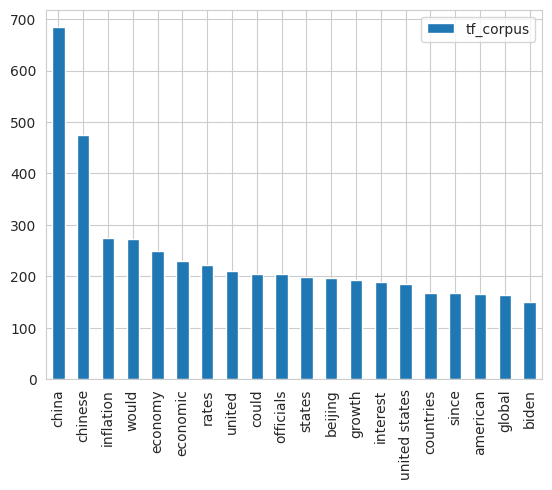

In [124]:
cv_matrix_corp_t[['tf_corpus']].nlargest(20, 'tf_corpus').plot(kind='bar')
plt.show()



In [282]:
# Econ DATA
# Creating dataframe from CV Matrix
cv=CountVectorizer(ngram_range=(1,3))
final_processed_text_cv1 = final_processed_text1.copy()
cv_matrix1=cv.fit_transform(final_processed_text_cv1)
cv_matrix1=pd.DataFrame(cv_matrix1.toarray(), columns=cv.get_feature_names_out(), index=titles)

In [283]:
# US Relations DATA
# Creating dataframe from CV Matrix
cv=CountVectorizer(ngram_range=(1,3))
final_processed_text_cv2 = final_processed_text2.copy()
cv_matrix2 =cv.fit_transform(final_processed_text_cv2)
cv_matrix2 =pd.DataFrame(cv_matrix2.toarray(), columns=cv.get_feature_names_out(), index=titles)

In [284]:
# Trying few things out (Ali)

# Create transposed dataframe from CV Matrix
matrix_corp_t1 = matrix1.transpose()
cv_matrix_corp_t1 = cv_matrix1.transpose()

# Sum all the terms to create Term Frequency and Document Frequency for each term
cv_matrix_corp_t1['df_corpus']= (cv_matrix_corp_t1 != 0).sum(axis=1)
cv_matrix_corp_t1['tf_corpus']= cv_matrix_corp_t1.sum(axis=1) - cv_matrix_corp_t1['df_corpus']

# Remove uncessary columns from the dataframe after summing them
idx = np.r_[0:102]
cv_matrix_corp_t1.drop(cv_matrix_corp_t1.columns[idx], axis=1, inplace=True)

print("Top 10 Terms based on document frequency.")
print(cv_matrix_corp_t1[['df_corpus']].nlargest(20, 'df_corpus'))
print("\n")
print("Top 10 Terms based on frequency.")
print(cv_matrix_corp_t1[['tf_corpus']].nlargest(20, 'tf_corpus'))

Top 10 Terms based on document frequency.
            df_corpus
would             136
china             117
since             108
economic          102
officials         102
could             101
chinese            98
economy            94
years              90
first              88
months             82
still              82
month              81
government         80
policy             80
recent             80
united             80
interest           78
president          78
states             77


Top 10 Terms based on frequency.
               tf_corpus
china                684
chinese              475
inflation            274
would                272
economy              250
economic             229
rates                223
united               211
could                205
officials            205
states               198
beijing              197
growth               192
interest             189
united states        185
countries            167
since                167
american   

In [285]:
# Trying few things out (Ali)

# Create transposed dataframe from CV Matrix
matrix_corp_t2 = matrix2.transpose()
cv_matrix_corp_t2 = cv_matrix2.transpose()

# Sum all the terms to create Term Frequency and Document Frequency for each term
cv_matrix_corp_t2['df_corpus']= (cv_matrix_corp_t2 != 0).sum(axis=1)
cv_matrix_corp_t2['tf_corpus']= cv_matrix_corp_t2.sum(axis=1) - cv_matrix_corp_t2['df_corpus']

# Remove uncessary columns from the dataframe after summing them
idx = np.r_[0:102]
cv_matrix_corp_t2.drop(cv_matrix_corp_t2.columns[idx], axis=1, inplace=True)

print("Top 10 Terms based on document frequency.")
print(cv_matrix_corp_t2[['df_corpus']].nlargest(20, 'df_corpus'))
print("\n")
print("Top 10 Terms based on frequency.")
print(cv_matrix_corp_t2[['tf_corpus']].nlargest(20, 'tf_corpus'))

Top 10 Terms based on document frequency.
            df_corpus
would             136
china             117
since             108
economic          102
officials         102
could             101
chinese            98
economy            94
years              90
first              88
months             82
still              82
month              81
government         80
policy             80
recent             80
united             80
interest           78
president          78
states             77


Top 10 Terms based on frequency.
               tf_corpus
china                684
chinese              475
inflation            274
would                272
economy              250
economic             229
rates                223
united               211
could                205
officials            205
states               198
beijing              197
growth               192
interest             189
united states        185
countries            167
since                167
american   

### Explore TFIDF Values


In [125]:
###############################################################################
### Explore TFIDF Values
###############################################################################

average_TFIDF={}
for i in matrix.columns:
    average_TFIDF[i]=np.mean(matrix[i])

average_TFIDF_DF=pd.DataFrame(average_TFIDF,index=[0]).transpose()

average_TFIDF_DF.columns=['TFIDF']

#calculate Q1 and Q3 range
Q1=np.percentile(average_TFIDF_DF, 25)
Q3=np.percentile(average_TFIDF_DF, 75)
IQR = Q3 - Q1
outlier=Q3+(1.5*IQR)


#words that exceed the Q3+IQR*1.5
outlier_list=average_TFIDF_DF[average_TFIDF_DF['TFIDF']>=outlier]



#can export matrix to csv and explore further if necessary


In [ ]:
###############################################################################
### Doc2Vec
###############################################################################
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

In [141]:
doc2vec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, index to 99
dtypes: float32(100), int64(1)
memory usage: 79.8 KB


# Econ and US Data

In [288]:
###############################################################################
### Doc2Vec
###############################################################################
documents1 = [TaggedDocument(doc, [i]) for i, doc in enumerate(processed_text1)]
model1 = Doc2Vec(documents1, vector_size=100, window=2, min_count=1, workers=4)

doc2vec_df1=pd.DataFrame()
for i in range(0,len(processed_text1)):
    vector1=pd.DataFrame(model1.infer_vector(processed_text1[i])).transpose()
    doc2vec_df1=pd.concat([doc2vec_df1,vector], axis=0)

doc2vec_df1=doc2vec_df1.reset_index()

doc_titles1={'title': titles1}
t1=pd.DataFrame(doc_titles1)

doc2vec_df1=pd.concat([doc2vec_df1,t1], axis=1)

doc2vec_df1=doc2vec_df1.drop('index', axis=1)

In [290]:
###############################################################################
### Doc2Vec
###############################################################################
documents2 = [TaggedDocument(doc, [i]) for i, doc in enumerate(processed_text2)]
model2= Doc2Vec(documents2, vector_size=100, window=2, min_count=1, workers=4)

doc2vec_df2=pd.DataFrame()
for i in range(0,len(processed_text2)):
    vector2=pd.DataFrame(model2.infer_vector(processed_text2[i])).transpose()
    doc2vec_df2=pd.concat([doc2vec_df2,vector], axis=0)

doc2vec_df2=doc2vec_df2.reset_index()

doc_titles2={'title': titles2}
t2=pd.DataFrame(doc_titles2)

doc2vec_df2=pd.concat([doc2vec_df2,t2], axis=1)

doc2vec_df2=doc2vec_df2.drop('index', axis=1)

In [ ]:
final_processed_text

In [127]:
doc2vec_df.head()

index         0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47  \
0      0  0.003724  0.000094 -0.003488  0.002006  0.001635 -0.004460  0.000628 -0.004535 -0.004302  0.004710  0.002529  0.000400 -0.003861  0.000263 -0.003923  0.002014  0.003656  0.004982  0.003266  0.000013  0.002032  0.000330  0.001441 -0.001306  0.000622 -0.000470 -0.004920 -0.002167  0.004213  0.003850 -0.000437  0.002483 -0.002946 -0.003129 -0.001565  0.000097 -0.002194 -0.000145  0.003613  0.001303 -0.001436 -0.000838 -0.000824 -0.002677 -0.004755  0.000419  0.001062 -0.000237   
1      0  0.002242  0.001545 -0.001017  0.003404  0.002116  0.003194  0.003840 -0.004589 -0.002333 -0.002486  0.002216 -0.001357  0.000558 -0.003290 -0.001928 -0.003416 -0.001227  0.000546 -0.002264  0.003968  0.003651  0.003508 -0.001347  0.001676 -0.001839 -0.003924 -0.001973 -0.000594  0.000707 -0.002384 -0.000102 -0.001456 -0.002585  0.003645  0.004395  0.003171  0.003142  0.000243 -0.000529  0.003707 -0.003351 -0.003870  0.003586  0.000948  0.001890 -0.001313 -0.002263 -0.004112   
2      0 -0.003092  0.004247  0.003204 -0.000234 -0.004528  0.002925  0.003763  0.002471  0.002035 -0.002134 -0.001561 -0.004382 -0.002470  0.001760  0.003179 -0.001744 -0.001352 -0.002509 -0.002962  0.001211  0.004962  0.004638 -0.003470  0.000597  0.003655  0.004974  0.001238 -0.004698 -0.000136 -0.003776 -0.002708 -0.001314 -0.003447  0.000774  0.004890 -0.002456 -0.000062  0.003956 -0.003579 -0.001908 -0.002549 -0.004205 -0.003373  0.002453  0.004326  0.002470 -0.002444 -0.003339   
3      0  0.000324 -0.002013 -0.004055 -0.000200 -0.004546  0.000867 -0.003106  0.003013  0.000650  0.004095 -0.001597  0.000824 -0.001086  0.002675 -0.003824  0.002379 -0.003446 -0.001962 -0.003458 -0.003473 -0.002290  0.002264  0.004173  0.003236 -0.004850  0.003392  0.003629  0.003039 -0.001327 -0.001478 -0.000861 -0.001415 -0.002249 -0.000745  0.003772 -0.003857 -0.001913  0.004998 -0.004117 -0.002232  0.001430  0.002084  0.000251 -0.004835 -0.000043 -0.002933 -0.003616 -0.000654   
4      0  0.002240  0.001753  0.000141  0.003800 -0.004883 -0.003395 -0.003525  0.001700 -0.002669 -0.000325  0.002241  0.001809  0.001097  0.003346 -0.004980  0.001559  0.001715 -0.003755  0.001444  0.004677 -0.000287  0.000573 -0.000397 -0.003700 -0.000995  0.000922  0.004301 -0.003012 -0.004285  0.001192  0.001633  0.000847 -0.001522  0.000190  0.002240 -0.003938  0.003117  0.003301 -0.004159  0.002208  0.000506 -0.004817  0.002431 -0.004949  0.004368 -0.004541  0.003846  0.001990   

         48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96  \
0 -0.004199 -0.004608  0.001537  0.001220 -0.002692  0.002793 -0.001974 -0.003394 -0.004722 -0.002300 -0.004555 -0.000172 -0.001562  0.003093 -0.004488  0.003923 -0.003063  0.001049  0.000123 -0.001457  0.000865  0.002628  0.004387  0.002471 -0.002661  0.002561 -0.002093  0.003775  0.004818 -0.000728 -0.002734  0.003228  0.004954 -0.003498  0.003344  0.003243 -0.001225 -0.003497  0.004818 -0.001647  0.000290 -0.002376 -0.003922 -0.003847 -0.002684 -0.000144  0.002674  0.004356 -0.003916   
1 -0.004936 -0.000164 -0.001940 -0.000039  0.002974  0.00463

In [35]:
##############################################################################
### Gensim Word2vec
###############################################################################

#Note, there are opportunities to use the word2vec matrix to determine words
#which are similar.  Similar words can be used to create equivalent classes.
#k-means is not used to group individual words using the Word2Vec output.

#word to vec
model_w2v = Word2Vec(processed_text, vector_size=100, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()


In [128]:
w2v_df.index

Index(['pricesensitive', 'downward', 'declined', 'instance', 'enrolling', 'research', 'repeatedly', 'error', 'humanity', 'reliant',
       ...
       'shares', 'recommendations', 'envisioned', 'survey', 'modern', 'blasted', 'representatives', 'equalling', 'mostâ', 'worldclass'], dtype='object', length=9618)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


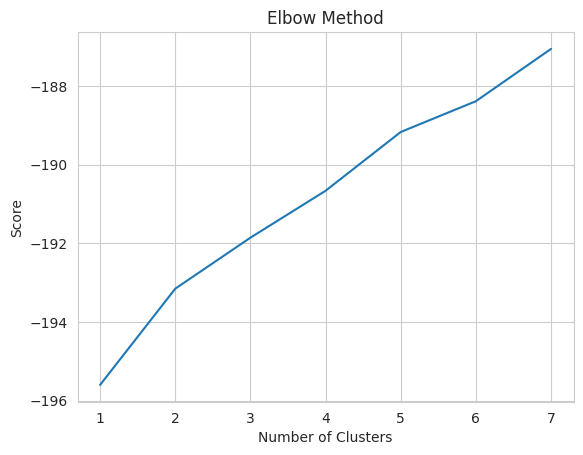

In [129]:
number_clusters = range(1, 8)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(TFIDF_matrix).score(TFIDF_matrix) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [130]:
###############################################################################
### K Means Clustering - TFIDF
###############################################################################
k=8
km = KMeans(n_clusters=k, random_state =89)
km.fit(TFIDF_matrix)
clusters = km.labels_.tolist()


terms = Tfidf.get_feature_names_out()
Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])


print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms_dict=[]


#save the terms for each cluster and document to dictionaries.  To be used later
#for plotting output.

#dictionary to store terms and titles
cluster_terms={}
cluster_title={}


for i in range(k):
    print("Cluster %d:" % i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i]=temp_terms

    print("Cluster %d titles:" % i, end='')
    temp=frame[frame['Cluster']==i]
    for title in temp['Doc Name']:
        print(' %s,' % title, end='')
        temp_titles.append(title)
    cluster_title[i]=temp_titles






NotFittedError: ignored

## Onotolgy for Econ and Relations Data

In [291]:
txt1=final_processed_text1
txt2=final_processed_text2

In [292]:
txt1 = " ".join(txt1)
txt2 = " ".join(txt2)

In [293]:
nlp = spacy.load("en_core_web_sm")
doc1 = nlp(txt1)
doc2 = nlp(txt2)

In [295]:
# from text to a list of sentences
lst_docs1 = [sent for sent in doc1.sents]
print("tot sentences:", len(lst_docs1))

tot sentences: 32


In [294]:
# from text to a list of sentences
lst_docs2 = [sent for sent in doc2.sents]
print("tot sentences:", len(lst_docs2))

tot sentences: 32


In [303]:
i = 3
lst_docs1[i]

invasion ukraine result deficits widened debts roseâ european governments rules remain exactly pandemic suspension significant criticism rather restrain daytoday spending rules prompted governments investment boosts longterm growth including economy greener governments rules exempt certain kinds investment spending others believe rules loose since found consensus changes subject constraints different selfimposed rules budget deficit coming years scare prime ministerâ trussâ announced surprise package large sparking selloff government market newsâ aboutâ economyâ seems rolling third quarterâ expanded barnstorming annualised terms heading earnings season month quarter firms report latest results stream upbeat economic figures stockmarketanalysts theirâ profit expectationsâ quarter steady rather normally called corporateearnings recession optimism looks justified following hattrick consecutive yearonyear quarterly profit declines america bottom growing according factset provider roughly c

In [304]:
for token in lst_docs1[i]:
    print(token.text, "-->", "pos: "+token.pos_, "|", "dep: "+token.dep_, "")

invasion --> pos: NOUN | dep: compound 
ukraine --> pos: PROPN | dep: compound 
result --> pos: NOUN | dep: compound 
deficits --> pos: NOUN | dep: nsubj 
widened --> pos: VERB | dep: ccomp 
debts --> pos: ADJ | dep: amod 
roseâ --> pos: ADJ | dep: amod 
european --> pos: ADJ | dep: amod 
governments --> pos: NOUN | dep: compound 
rules --> pos: NOUN | dep: nsubj 
remain --> pos: VERB | dep: ccomp 
exactly --> pos: ADV | dep: advmod 
pandemic --> pos: ADJ | dep: amod 
suspension --> pos: NOUN | dep: nmod 
significant --> pos: ADJ | dep: amod 
criticism --> pos: NOUN | dep: attr 
rather --> pos: ADV | dep: advmod 
restrain --> pos: VERB | dep: acl 
daytoday --> pos: NOUN | dep: compound 
spending --> pos: NOUN | dep: compound 
rules --> pos: NOUN | dep: dobj 
prompted --> pos: VERB | dep: advcl 
governments --> pos: NOUN | dep: dobj 
investment --> pos: NOUN | dep: nsubj 
boosts --> pos: VERB | dep: relcl 
longterm --> pos: ADJ | dep: amod 
growth --> pos: NOUN | dep: dobj 
including --

In [307]:
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})")

european (NORP)
coming years (DATE)
third (ORDINAL)
season month quarter (DATE)
quarterly (DATE)
america (GPE)
quarterly (DATE)
quarterly (DATE)
third quarter (DATE)
american (NORP)
third (ORDINAL)
morgan stanley (ORG)
september (DATE)
august (DATE)
october (DATE)
month (DATE)
americans (NORP)
israel (GPE)
american (NORP)
american (NORP)
russia (GPE)
china (GPE)


In [ ]:
!pip install textacy


In [299]:
import textacy


## Applying SpaCy on to Econ and Relations Data

In [309]:
## extract entities and relations
dic1 = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs1):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic1["id"].append(n)
        dic1["text"].append(sentence.text)
        dic1["entity"].append(subj)
        dic1["object"].append(obj)
        dic1["relation"].append(relation)


## create dataframe
dtf1 = pd.DataFrame(dic1)

## example
dtf1[dtf1["id"]==i]

id                                               text                     entity      relation                                             object
155   3  invasion ukraine result deficits widened debts...            result_deficits       widened                                     earnings_calls
156   3  invasion ukraine result deficits widened debts...                 investment        boosts                                             growth
157   3  invasion ukraine result deficits widened debts...           kinds_investment       believe                                              rules
158   3  invasion ukraine result deficits widened debts...          constraints_years         scare                                   surprise_package
159   3  invasion ukraine result deficits widened debts...     market_aboutâ_economyâ         seems                                     earnings_calls
160   3  invasion ukraine result deficits widened debts...           rolling_quarterâ      expanded              barnstorming_annualised_terms_heading
161   3  invasion ukraine result deficits widened debts...                    results        stream                      figures_expectationsâ_quarter
162   3  invasion ukraine result deficits widened debts...         recession_optimism        called                      figures_expectationsâ_quarter
163   3  invasion ukraine result deficits widened debts...         recession_optimism         looks                      figures_expectationsâ_quarter
164   3  invasion ukraine result deficits widened debts...                    results        beaten                                profit_expectations
165   3  invasion ukraine result deficits widened debts...                     bosses        failed                                          investors
166   3  invasion ukraine result deficits widened debts...  forecasts_price_investors  underwhelmed  cloudcomputing_division_warning_macroeconomic_...
167   3  invasion ukraine result deficits widened debts...                    profits       lending                               rates_interest_gloom
168   3  invasion ukraine result deficits widened debts...    august_cocacola_pepsico        seemed                        profit_guidance_price_rises
169   3  invasion ukraine result deficits widened debts...    august_cocacola_pepsico        raised                        profit_guidance_price_rises
170   3  invasion ukraine result deficits widened debts...                   payments     threeyear                              carloan_delinquencies
171   3  invasion ukraine result deficits widened debts...            result_deficits       refrain                                     earnings_calls
172   3  invasion ukraine result deficits widened debts...                      risks      conclude                                              costs

In [310]:
## extract entities and relations
dic2 = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n,sentence in enumerate(lst_docs2):
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))
    for sent in lst_generators:
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic2["id"].append(n)
        dic2["text"].append(sentence.text)
        dic2["entity"].append(subj)
        dic2["object"].append(obj)
        dic2["relation"].append(relation)


## create dataframe
dtf2 = pd.DataFrame(dic2)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



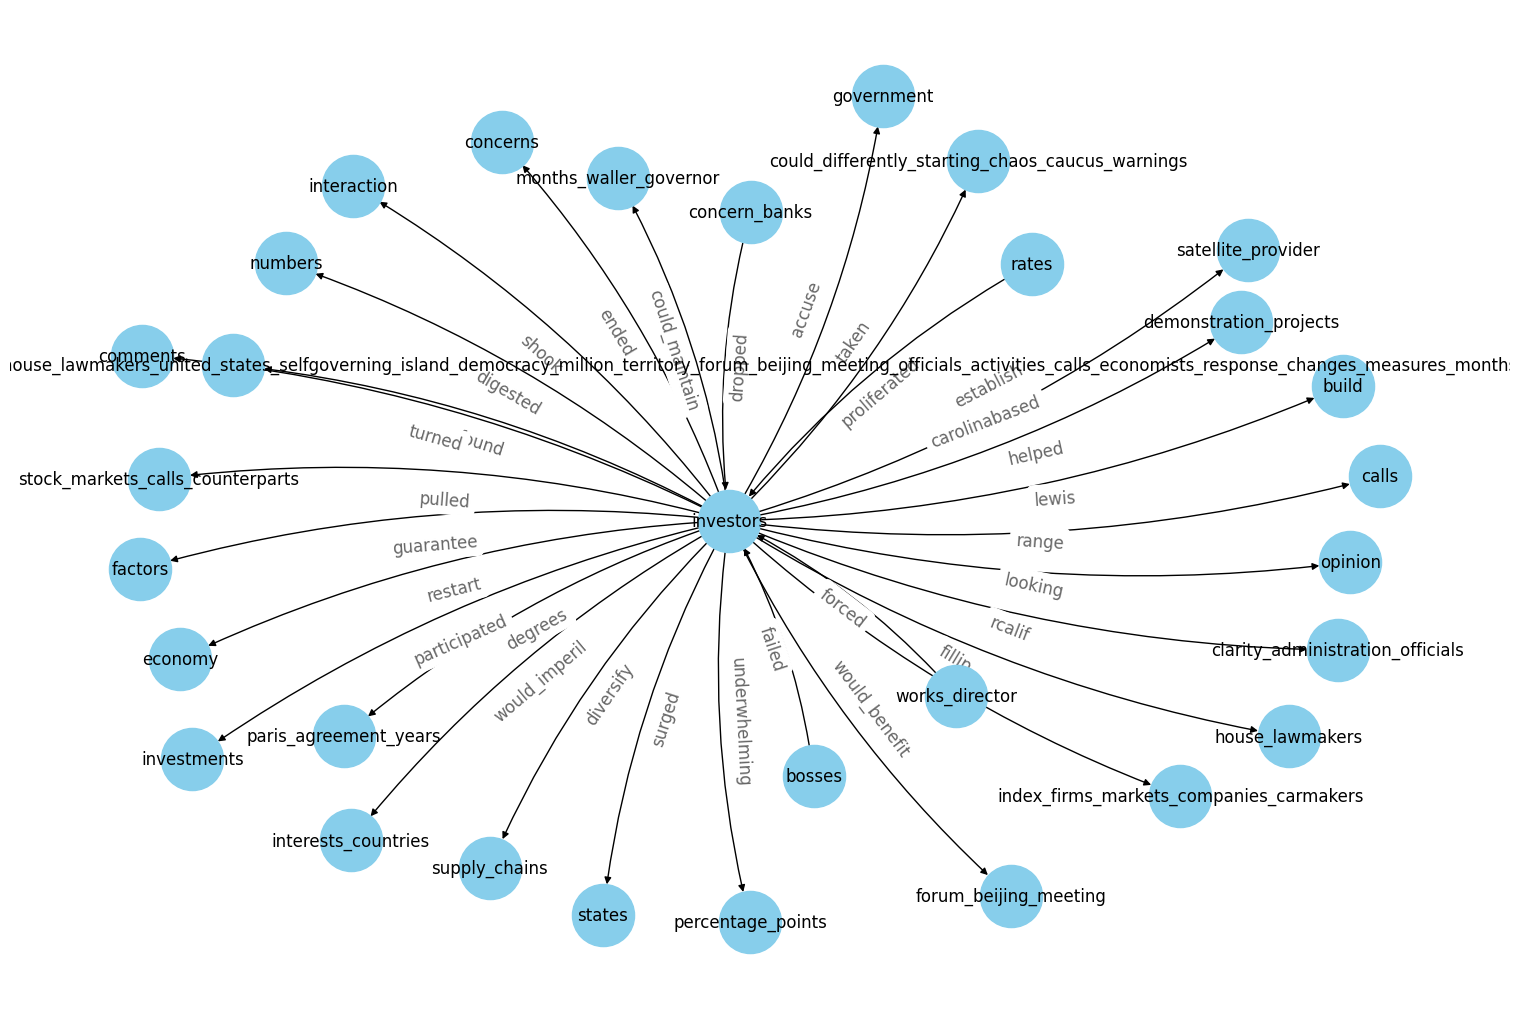

In [322]:
## create full graph

f = "investors"
tmp1 = dtf1[(dtf1["entity"]==f) | (dtf1["object"]==f)]
G1 = nx.from_pandas_edgelist(tmp1, source="entity", target="object",
                            edge_attr="relation",
                            create_using=nx.DiGraph())


## plot
plt.figure(figsize=(15,10))

pos = nx.spring_layout(G1, k=1)
node_color = "skyblue"
edge_color = "black"

nx.draw(G1, pos=pos, with_labels=True, node_color=node_color,
        edge_color=edge_color, cmap=plt.cm.Dark2,
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G1, pos=pos, label_pos=0.5,
                         edge_labels=nx.get_edge_attributes(G1,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



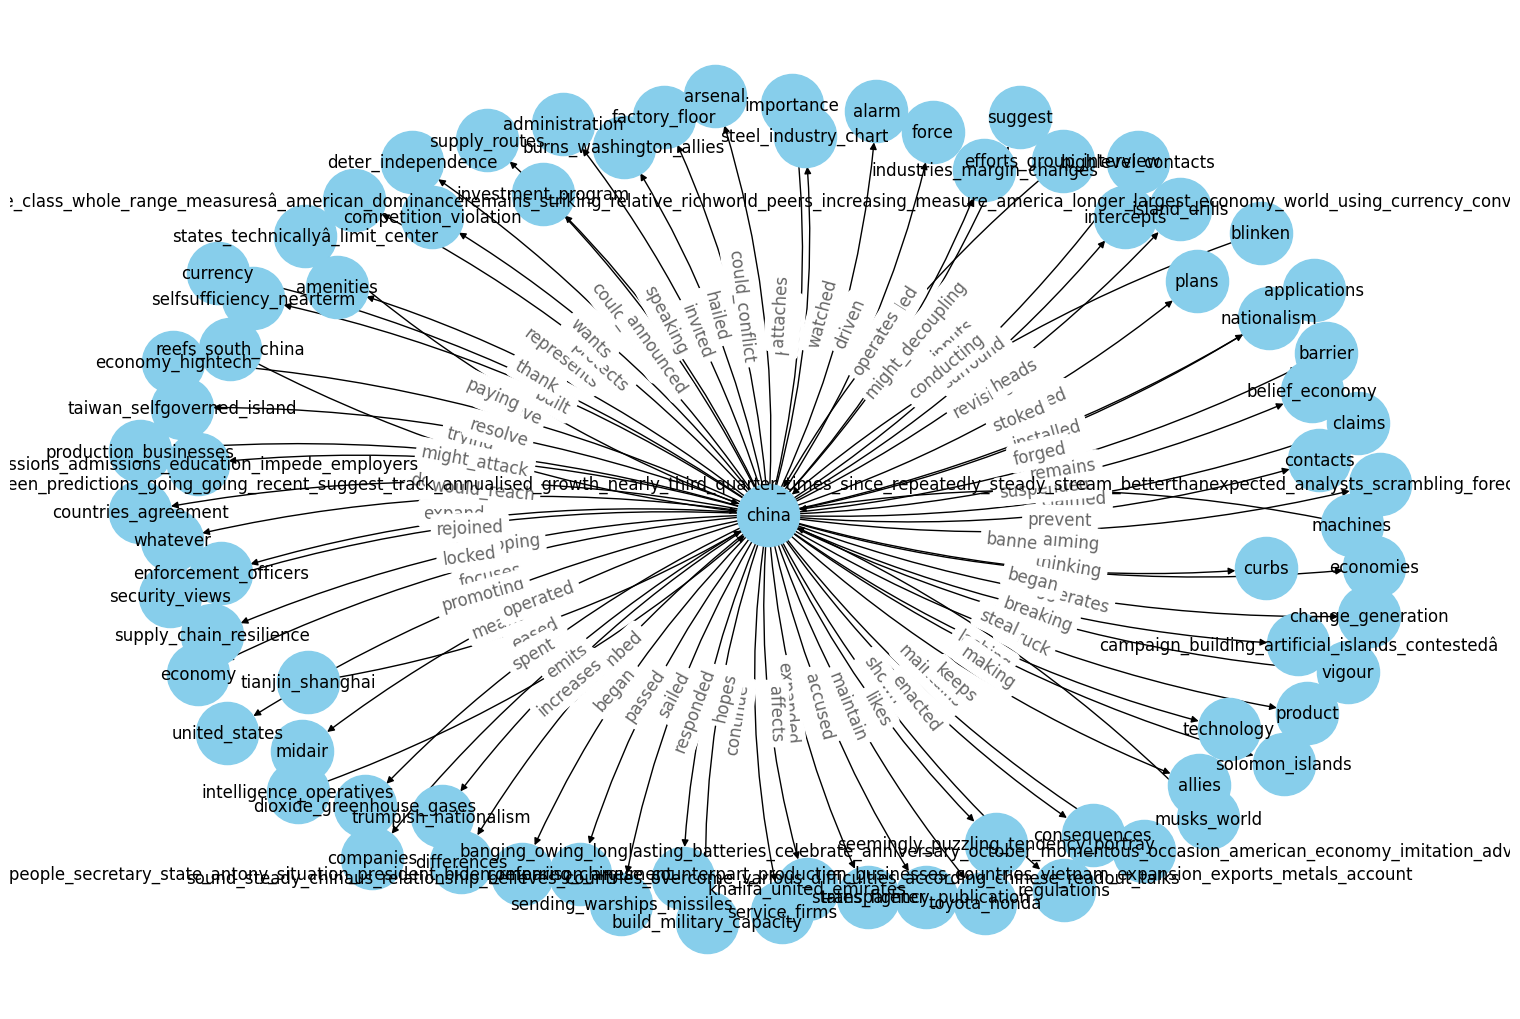

In [324]:
## create full graph

f = "china"
tmp2 = dtf2[(dtf2["entity"]==f) | (dtf2["object"]==f)]
G1 = nx.from_pandas_edgelist(tmp2, source="entity", target="object",
                            edge_attr="relation",
                            create_using=nx.DiGraph())


## plot
plt.figure(figsize=(15,10))

pos = nx.spring_layout(G1, k=1)
node_color = "skyblue"
edge_color = "black"

nx.draw(G1, pos=pos, with_labels=True, node_color=node_color,
        edge_color=edge_color, cmap=plt.cm.Dark2,
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G1, pos=pos, label_pos=0.5,
                         edge_labels=nx.get_edge_attributes(G1,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()

In [321]:
#dtf1["entity"].value_counts().head()
dtf1["entity"].value_counts().head()

china        71
investors    28
economy      24
officials    24
inflation    20
Name: entity, dtype: int64

##Plotting

Convert two components as we're plotting points in a two-dimensional plane "precomputed" because we provide a distance matrix
We will also specify random_state so the plot is reproducible.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


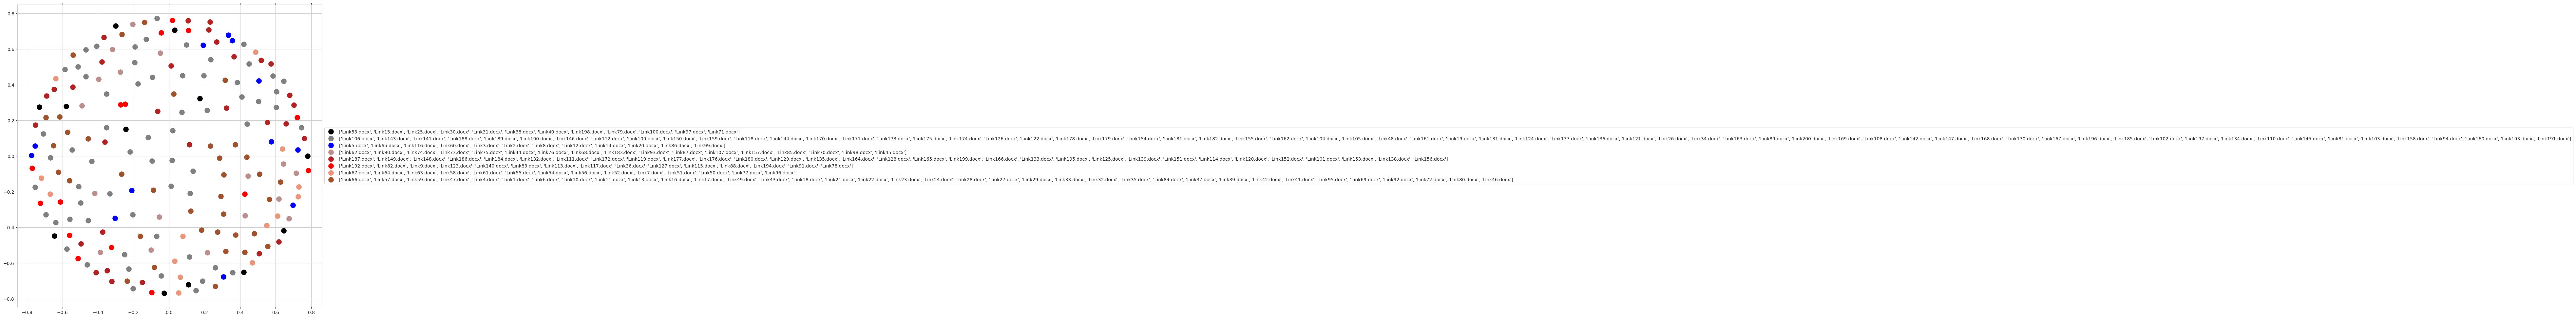

In [111]:

###############################################################################
### Plotting
###############################################################################

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.


mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(TFIDF_matrix)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick',
                  5:'red', 6:'darksalmon', 7:'sienna'}


#set up cluster names using a dict.
cluster_dict=cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters))))

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_dict[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))      #show legend with only 1 point

In [142]:
model_RF=RandomForestClassifier()

#TFIDF
Y=clusters
X=TFIDF_matrix

#cross validation
cv_score=cross_val_score(model_RF, X,Y, cv=10)

#mean CV score
np.mean(cv_score)

0.5000000000000001

In [109]:
term_clusters = pd.DataFrame.from_dict(cluster_terms) #pull out terms into a dataframe
terms = term_clusters.stack() #stack terms names into 1 column
terms = terms.reset_index() #move index into a column
terms = terms.rename(columns={'level_1': 'cluster_term', 0:'term'}) #rename columns
terms = terms.drop(['level_0'], axis=1) #drop unecessary column
terms.head()

cluster_term         term
0             0      workers
1             1        china
2             2  republicans
3             3      economy
4             4      chinese

In [112]:
# look at frequent terms across clusters
term_clusters

0              1            2          3          4             5           6               7
0        workers          china  republicans    economy    chinese         china  percentage       inflation
1          labor        chinese        limit     growth      china       america     central           rates
2          solar        beijing     treasury   spending  countries    population  tightening         percent
3        college         taiwan   government    quarter    beijing      overtake       banks        interest
4      employees       military      default  inflation     united  productivity   inflation          prices
5   labor market         united        biden     annual   american        growth       rates  interest rates
6         people         states     congress   interest     taiwan      exchange     markets         central
7  manufacturing     washington     spending      rates   military      economic   financial         economy
8       xinjiang  united states        house   consumer     states      currency    interest          market
9          years        foreign     trillion     market      cyber         years       rises       recession

In [113]:
titles = pd.DataFrame.from_dict(cluster_title, orient='index') #convert tiles to a dataframe
titles = titles.stack() #stack document names into 1 column
titles = titles.reset_index() #move index into a column
titles = titles.rename(columns={'level_0': 'cluster_doc', 0:'document'}) #rename columns
titles = titles.drop(['level_1'], axis=1) #drop unecessary column
titles.head()

cluster_doc     document
0            0  Link53.docx
1            0  Link15.docx
2            0  Link25.docx
3            0  Link30.docx
4            0  Link31.docx

In [114]:
# join TFIDF values to documents in new dataframe w/ clusters
term_list = terms['term'].values.tolist() #pull all terms into a list
matrix_clustering = matrix[term_list] #pull out only terms in clusters
full_titles = titles.set_index('document').join(matrix_clustering, how='left') # join in tf-idf values
full_titles.shape

(200, 81)

In [115]:
# calculate average tf-idf values for each cluster of terms
for i in range (k):
    full_titles[i] = full_titles[term_clusters[i].values.tolist()].mean(axis=1)

KeyError: ignored

In [132]:
# remove all other columsn leaving only the average
full_titles = full_titles.set_index('cluster_doc', append=True)
full_titles_final = full_titles[full_titles.columns[-k:]]

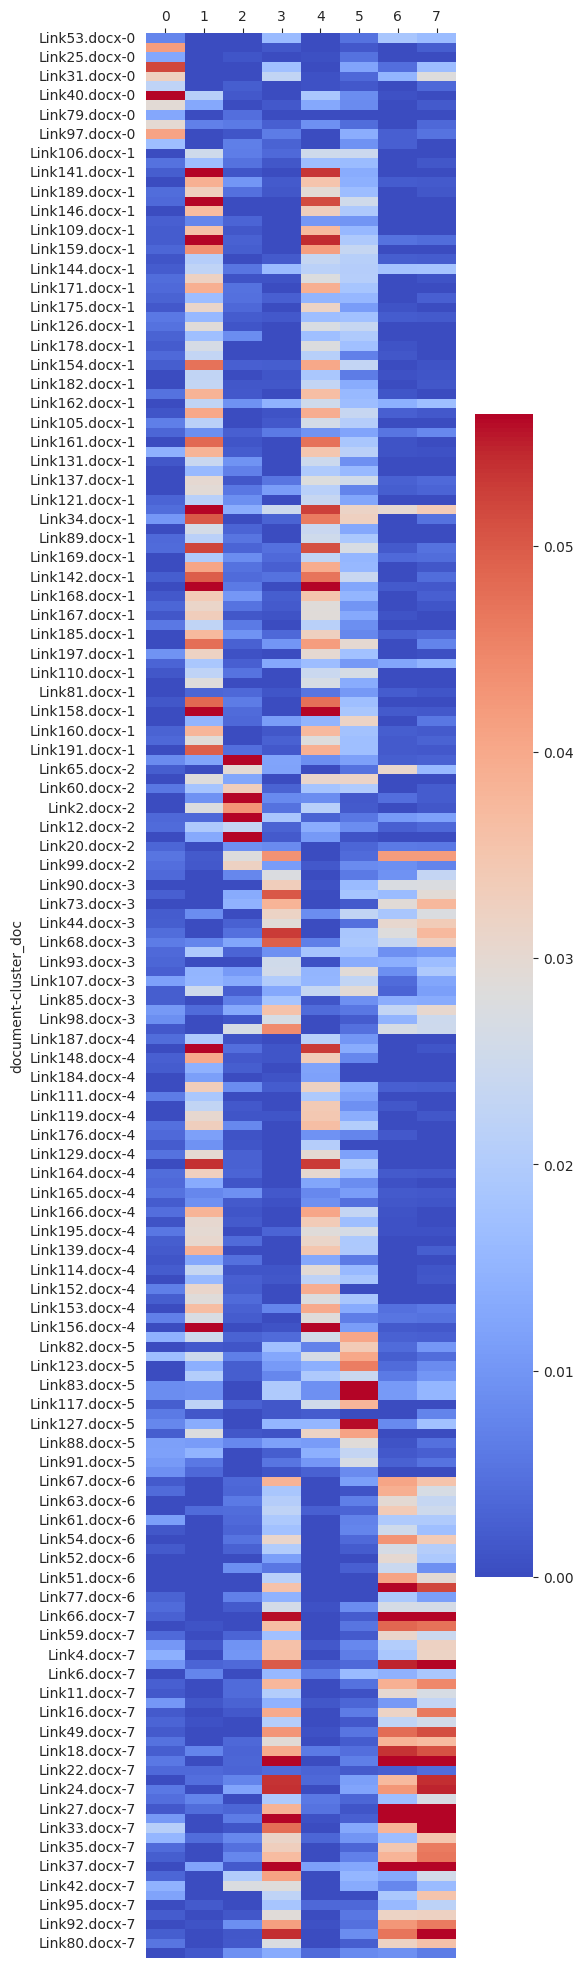

In [133]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(5,25))
plt.rcParams['font.size'] = 10
p=sns.heatmap(full_titles_final, cmap='coolwarm', robust=True)
p.xaxis.tick_top()
p.xaxis.set_label_position('top')

### Comparing Cluster Groupings



In [134]:
# merging dataframes
kl_groups1 = full_titles_final.copy()
kl_groups1 = kl_groups1.reset_index()
k1_groups2 = kl_groups1[['document','cluster_doc']].copy()

data1 = data.copy()
data2 = data1[['DSI_Title','Title','Date']].copy()
data2.rename(columns={'DSI_Title':'document'}, inplace=True)

# left join
kl_groups_final = k1_groups2.merge(data2, on ='document', how='left')

print(k1_groups2.shape)
print(data2.shape)
print(kl_groups_final.shape)

(200, 2)
(200, 3)
(200, 4)


In [135]:
# add random variable
kl_groups_final['randNumCol'] = np.random.randint(1, 103, kl_groups_final.shape[0])

# change cluster to be string
kl_groups_final['cluster'] = kl_groups_final['cluster_doc'].astype(str)

kl_groups_final.head()

document  cluster_doc                                              Title     Date  randNumCol cluster
0  Link53.docx            0  Unchecked corporate pricing power is a factor ...  3/18/23          90       0
1  Link15.docx            0  How Remote Work Connected Employees Making $19...  5/31/23          42       0
2  Link25.docx            0  Affirmative Action Ruling May Upend Hiring Pol...  6/30/23          96       0
3  Link30.docx            0  The ÔGreat ResignationÕ Is Over. Can WorkersÕ ...   7/6/23          46       0
4  Link31.docx            0  Job Openings Dipped in May, a Sign of Continue...   7/6/23          18       0

In [137]:
kl_groups_final = kl_groups_final.sort_values(by='Date')


In [138]:
import plotly.express as px
fig = px.scatter(kl_groups_final, x="Date", y="randNumCol", color="cluster", hover_data=['document']
                 ,width=800, height=600)

fig.update_traces(marker=dict(size=10,
                              opacity=0.8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
#fig.show()

In [ ]:
from datetime import datetime
kl_groups_final['Date']= pd.to_datetime(kl_groups_final['Date'])


In [ ]:
kl_groups_final['Date'] = kl_groups_final['Date'].dt.strftime('%m/%d/%y')
#kl_groups_final['Date'] = pd.to_datetime(kl_groups_final['Date'], errors='coerce')


In [ ]:
kl_groups_final = kl_groups_final.sort_values(by='Date')


In [ ]:
import plotly.express as px
fig = px.scatter(kl_groups_final, x="Date", y="randNumCol", color="cluster", hover_data=['document']
                 ,width=800, height=600)

fig.update_traces(marker=dict(size=10,
                              opacity=0.8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
#fig.show()

##K Means Clustering Doc2Vec

The following section of code is to run the k-means algorithm on the doc2vec outputs.
Note the differences in document clusters compared to the TFIDF matrix.

In [ ]:
# create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(data)):
    temp_text=data['DSI_Title'].iloc[i]
    titles.append(temp_text)
# create empty list to store text documents
text_body=[]

# for loop which appends the text to the text_body list
for i in range(0,len(data)):
    temp_text=data['Text'].iloc[i]
    text_body.append(temp_text)

# Note: the text_body is the unprocessed list of documents read directly form the csv.
# empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
# stitch back together individual words to reform body of text
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)
# Length of full tokenized corpus
len(temp_text)

2778

In [ ]:
final_processed_text_cd2v = final_processed_text.copy()
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text_cd2v)]
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

In [ ]:
# creating vector representation of the whole document

doc2vec_k_means=doc2vec_df.drop('title', axis=1)

k=8
km2 = KMeans(n_clusters=k, random_state =89)
km2.fit(doc2vec_k_means)
clusters_d2v = km2.labels_.tolist()

final_processed_text_copy2 = final_processed_text.copy()
Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text_copy2}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

# dictionary to store clusters and respective titles
cluster_title={}

# note doc2vec clusters will not have individual words due to the vector representation
# is based on the entire document not indvidual words. As a result, there won't be individual
# word outputs from each cluster.
for i in range(k):
    temp=frame[frame['Cluster']==i]
    temp_title_list=[]
    for title in temp['Doc Name']:
        temp_title_list.append(title)
    cluster_title[i]=temp_title_list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:

#The following section of code is to run the k-means algorithm on the doc2vec outputs.
#note the differences in document clusters compared to the TFIDF matrix.
###############################################################################
### K Means Clustering Doc2Vec
###############################################################################
doc2vec_k_means=doc2vec_df.drop('title', axis=1)

k=8
km = KMeans(n_clusters=k, random_state =89)
km.fit(doc2vec_k_means)
clusters_d2v = km.labels_.tolist()

Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

#dictionary to store clusters and respective titles
cluster_title={}

#note doc2vec clusters will not have individual words due to the vector representation
#is based on the entire document not indvidual words. As a result, there won't be individual
#word outputs from each cluster.
for i in range(k):
    temp=frame[frame['Cluster']==i]
    temp_title_list=[]
    for title in temp['Doc Name']:
        temp_title_list.append(title)
    cluster_title[i]=temp_title_list

In [ ]:
len(cluster_title)

8

In [ ]:
#Doc2Vec
Y=clusters_d2v
X=doc2vec_k_means

#cross validation
cv_score=cross_val_score(model_RF, X,Y, cv=7)

#mean CV score
np.mean(cv_score)

0.41995073891625617

In [ ]:
clusters

In [ ]:
len(cluster_title)

5

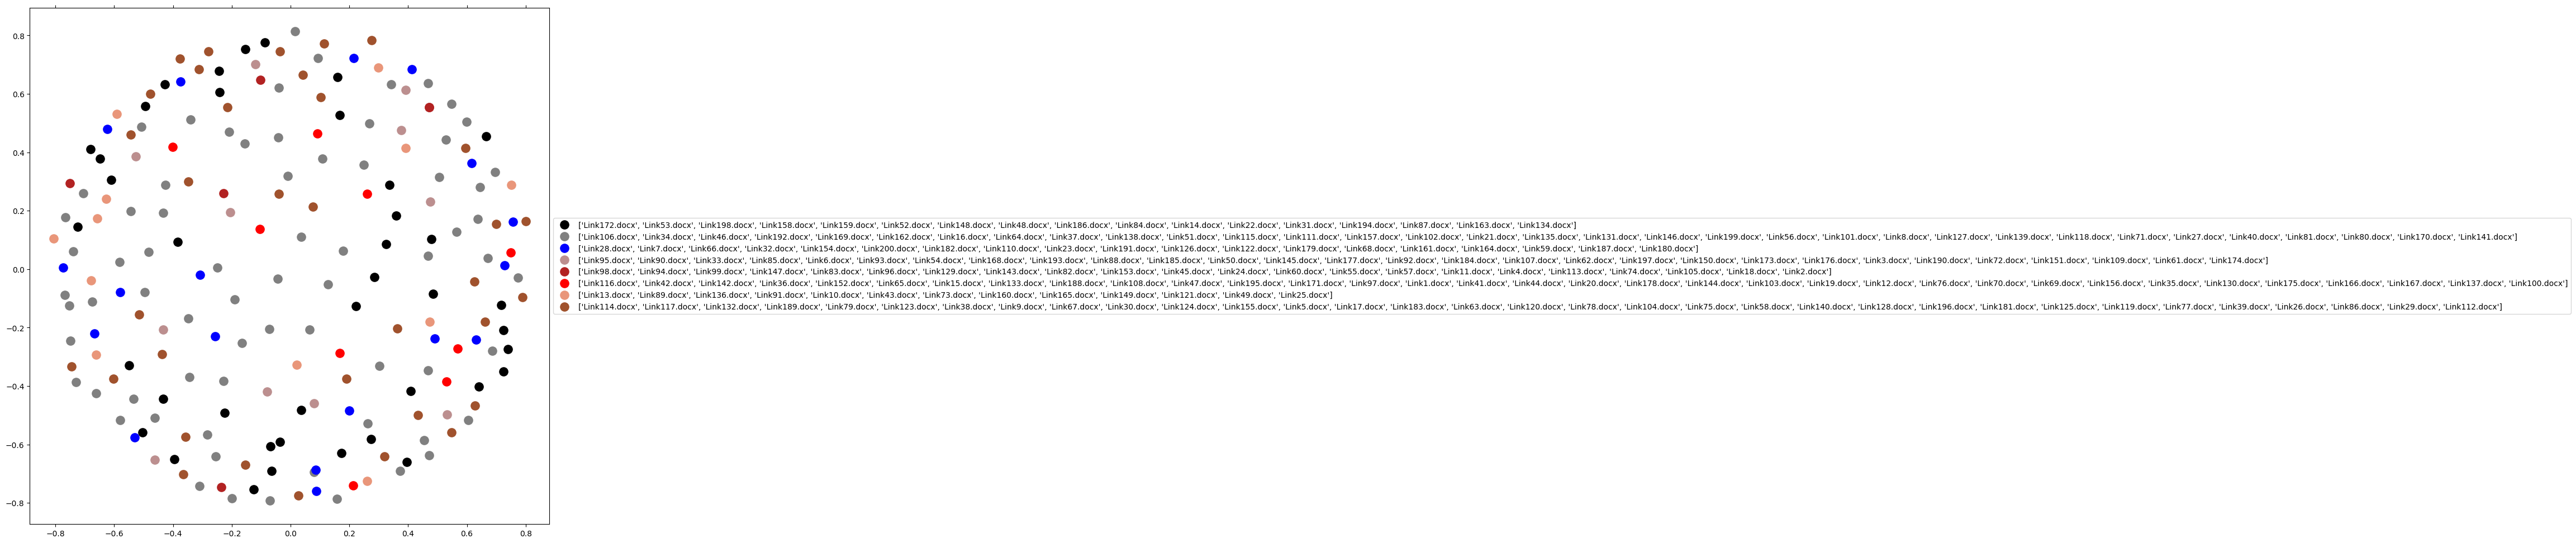

In [ ]:
###############################################################################
### Plotting Doc2vec
###############################################################################
# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.


mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1, normalized_stress='auto')

dist = 1 - cosine_similarity(doc2vec_k_means)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick',
                  5:'red', 6:'darksalmon', 7:'sienna'}


#set up cluster names using a dict.
cluster_dict=cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters))))

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_dict[name], color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))      #show legend with only 1 point


#The following section is used to create a model to predict the clusters labels
#based on the the TFIDF matrix and the doc2vec vectors.  Note the model performance
#using the two different vectorization methods.

### LDA - topic modeling

In [143]:
# create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(data)):
    temp_text=data['DSI_Title'].iloc[i]
    titles.append(temp_text)
# create empty list to store text documents
text_body=[]

# for loop which appends the text to the text_body list
for i in range(0,len(data)):
    temp_text=data['Text'].iloc[i]
    text_body.append(temp_text)

# Note: the text_body is the unprocessed list of documents read directly form the csv.
# empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
# stitch back together individual words to reform body of text
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)
# Length of full tokenized corpus
len(temp_text)

4594

In [144]:
# Topic Modeling
# LDA using bag of words
dictionary = corpora.Dictionary(processed_text)
corpus = [dictionary.doc2bow(doc) for doc in processed_text]

ldamodel = LdaMulticore(corpus, num_topics=4, id2word=dictionary, passes=10, workers=3)

for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.015*"inflation" + 0.011*"rates" + 0.010*"economy" + 0.008*"interest" + 0.008*"growth" + 0.007*"market" + 0.006*"percent" + 0.006*"prices" + 0.005*"higher" + 0.005*"central"
Topic: 1 
Words: 0.013*"china" + 0.009*"chinese" + 0.005*"companies" + 0.005*"government" + 0.004*"economic" + 0.004*"united" + 0.004*"would" + 0.004*"states" + 0.003*"years" + 0.003*"could"
Topic: 2 
Words: 0.008*"china" + 0.007*"chinese" + 0.004*"could" + 0.004*"people" + 0.003*"would" + 0.003*"taiwan" + 0.003*"america" + 0.003*"american" + 0.002*"taiwanese" + 0.002*"country"
Topic: 3 
Words: 0.019*"china" + 0.012*"chinese" + 0.007*"beijing" + 0.006*"united" + 0.005*"states" + 0.005*"would" + 0.005*"countries" + 0.005*"military" + 0.005*"officials" + 0.004*"washington"


In [ ]:
pip install pyLDAvis -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.2 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=processed_text,dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.24012144380513

Coherence Score:  0.428213406950311


In [ ]:
!pip install pandas


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [326]:
#LDA using TFIDF
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
ldamodel = LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=2)

for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.001*"inflation" + 0.001*"rates" + 0.001*"market" + 0.001*"workers" + 0.001*"recession" + 0.001*"spending" + 0.001*"labor" + 0.001*"prices" + 0.001*"percent" + 0.000*"economy"
Topic: 1 
Words: 0.001*"chinese" + 0.001*"china" + 0.001*"taiwan" + 0.001*"raimondo" + 0.001*"military" + 0.001*"flights" + 0.000*"relations" + 0.000*"beijing" + 0.000*"relationship" + 0.000*"biden"
Topic: 2 
Words: 0.001*"china" + 0.000*"chinese" + 0.000*"growth" + 0.000*"inflation" + 0.000*"beijing" + 0.000*"central" + 0.000*"military" + 0.000*"united" + 0.000*"economy" + 0.000*"states"
Topic: 3 
Words: 0.000*"china" + 0.000*"sullivan" + 0.000*"chinese" + 0.000*"rates" + 0.000*"america" + 0.000*"american" + 0.000*"taiwan" + 0.000*"beijing" + 0.000*"world" + 0.000*"universities"
Topic: 4 
Words: 0.001*"percent" + 0.001*"inflation" + 0.001*"china" + 0.001*"rates" + 0.001*"chinese" + 0.001*"interest" + 0.001*"economy" + 0.000*"central" + 0.000*"treasury" + 0.000*"growth"


In [328]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus_tfidf, dictionary)
vis

##LSA

In [ ]:
pip install textblob -q

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pip install --upgrade ipykernel


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [46]:
#testdata = data.copy()
#testdata = testdata.dropna(axis='columns')
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DSI_Title  200 non-null    object 
 1   Text       200 non-null    object 
 2   Website    200 non-null    object 
 3   Date       200 non-null    object 
 4   Title      200 non-null    object 
 5   Value      200 non-null    float64
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


In [47]:
# create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(testdata)):
    temp_text=testdata['DSI_Title'].iloc[i]
    titles.append(temp_text)
# create empty list to store text documents
text_body=[]

# for loop which appends the text to the text_body list
for i in range(0,len(testdata)):
    temp_text=testdata['Text'].iloc[i]
    text_body.append(temp_text)

# create empty list to store text documents titles
datestuff=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(testdata)):
    dat3=testdata['Value'].iloc[i]
    datestuff.append(dat3)

# create empty list to store text documents titles
dia1=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(testdata)):
    date1=testdata['Date'].iloc[i]
    dia1.append(date1)

# Note: the text_body is the unprocessed list of documents read directly form the csv.
# empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)
# stitch back together individual words to reform body of text
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)

In [50]:
Dictionary={'Doc Name':titles,'Date':dia1, 'Text': final_processed_text, "Unempl" : datestuff}
frame=pd.DataFrame(Dictionary, columns=['Doc Name','Text','Date', 'Unempl' ])
frame.head()

Doc Name                                               Text     Date  Unempl
0   Link67.docx  growth slowed fifth consecutive month december...   1/6/23     3.9
1  Link106.docx  domestic intelligence chief thomas haldenwang ...  1/17/23     3.9
2  Link192.docx  china officiallyâ recordedâ slight population ...  1/18/23     3.9
3    Link5.docx  america limit setting bitter fiscal fight wash...  1/19/23     3.9
4   Link66.docx  investors federal reserve officials interest r...  1/21/23     3.9

In [ ]:
for col in frame.columns:
    print(col)

Doc Name
Text
Date
Title


### LSA on Econ and Relations Data


In [451]:
#from datetime import datetime

#econdata.info()
econdata.isnull().sum()
#econdata.dropna(inplace=True)

DSI_Title    0
Text         0
Monthday     0
Date         0
Title        0
dtype: int64

In [452]:
titles1=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(econdata)):
    temp_text=econdata['DSI_Title'].iloc[i]
    titles1.append(temp_text)

#create empty list to store text documents
text_body1=[]

#for loop which appends the text to the text_body list
for i in range(0,len(econdata)):
    temp_text=econdata['Text'].iloc[i]
    text_body1.append(temp_text)
# create empty list to store text documents titles
moda1=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(econdata)):
    date1=relationsdata['Monthday'].iloc[i]
    moda1.append(date1)

#Note: the text_body is the unprocessed list of documents read directly form
#the csv.

#empty list to store processed documents
processed_text1=[]
#for loop to process the text to the processed_text list
for i in text_body1:
    text=clean_doc(i)
    processed_text1.append(text)

In [520]:
# create empty list to store text documents titles
dia1=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(econdata)):
    date1=relationsdata['Date'].iloc[i]
    dia1.append(date1)


In [521]:
# create empty list to store text documents titles
dia2=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(relationsdata)):
    date=relationsdata['Date'].iloc[i]
    dia2.append(date)


In [448]:
#Note: the processed_text is the PROCESSED list of documents read directly form
#the csv.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text1=[]

for i in processed_text1:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text1.append(temp_DSI)

In [431]:
titles2=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(relationsdata)):
    temp_text=relationsdata['DSI_Title'].iloc[i]
    titles2.append(temp_text)

#create empty list to store text documents
text_body2=[]

#for loop which appends the text to the text_body list
for i in range(0,len(relationsdata)):
    temp_text=relationsdata['Text'].iloc[i]
    text_body2.append(temp_text)

# create empty list to store text documents titles
moda2=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(relationsdata)):
    date=relationsdata['Monthday'].iloc[i]
    moda2.append(date)

#Note: the text_body is the unprocessed list of documents read directly form
#the csv.

#empty list to store processed documents
processed_text2=[]
#for loop to process the text to the processed_text list
for i in text_body2:
    text=clean_doc(i)
    processed_text2.append(text)

In [437]:
#Note: the processed_text is the PROCESSED list of documents read directly form
#the csv.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text2=[]

for i in processed_text2:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text2.append(temp_DSI)

In [ ]:
#titles1, titles2

frame['Date']= pd.to_datetime(frame['Date'])
# Modify dataframe
#df['President_Name'] = potus


In [ ]:
dia1

In [524]:

Dictionary1={'Doc Name':titles1,'Date':dia1, 'Text': final_processed_text1}
frame1=pd.DataFrame(Dictionary1, columns=['Doc Name','Text','Date'])
frame1.head()


Doc Name                                               Text      Date
0    Link1.docx  federal reserve officials believed needed econ...  10/26/23
1   Link10.docx  federal reserve officials widely expected borr...  09/21/23
2  Link100.docx  united workers makes perfect sense demand bett...  10/29/23
3   Link11.docx  federal reserve financial stability experts lo...  06/03/23
4   Link13.docx  prices soared coronavirus lockdowns years unit...  06/03/23

In [525]:

Dictionary2={'Doc Name':titles2,'Date':dia2, 'Text': final_processed_text2}
frame2=pd.DataFrame(Dictionary2, columns=['Doc Name','Text','Date'])
frame2.head()

Doc Name                                               Text      Date
0  Link101.docx  public communications appearing chinaus relati...  10/26/23
1  Link102.docx  earlier month commerce secretary raimondo visi...  09/21/23
2  Link103.docx  uncertainty still chinaus dialogue according t...  10/29/23
3  Link104.docx  defence secretary lloyd austin saturday critic...  06/03/23
4  Link105.docx  china account lowcost imports first decade sho...  06/03/23

In [ ]:
# Modify dataframe
data_sa['Date'] = data_sa['Date'].dt.strftime('%m/%d/%y')
#df['President_Name'] = potus

In [ ]:
final_processed_text_copy2 = final_processed_text.copy()
Dictionary={'Doc Name':titles,'Date':datestuff, 'Title':titles2, 'Text': final_processed_text_copy2}
frame=pd.DataFrame(Dictionary, columns=['Doc Name','Text', 'Date', 'Title'])
frame.head()

Doc Name                                               Text     Date                                              Title
0  Link106.docx  domestic intelligence chief thomas haldenwang ...  1/17/23          US-China relations pursue an ominous path
1   Link34.docx  micron technologies idaho chipmaker suffered s...   7/8/23       One Reason the U.S. CanÕt Quit China?ÊChips.
2   Link95.docx  monthsâ spectre recession haunted corporate am...   8/6/23  Beyond the tech hype, how healthy is American ...
3   Link98.docx  everybody knows economy faces significant head...  10/3/23  Despite Economic Risks, Companies Are Hanging ...
4   Link90.docx  celebratedâ twentyfirst thomas piketty french ...  5/24/23  The American credit cycle is at a dangerous point

In [ ]:
data_sa = data_sa.sort_values(by='Date')


In [ ]:
data_sa = frame.copy()

In [ ]:
!pip install textblob

### Sentiment Analysis

In [51]:
import textblob

In [52]:
from textblob import TextBlob


In [ ]:
data_sa['Text'] = data_sa['Text'].astype('str')


In [526]:
frame1['Text'] = frame1['Text'].astype('str')
frame2['Text'] = frame2['Text'].astype('str')


In [53]:
data_sa = frame.copy()


In [54]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
data_sa['polarity_score'] = data_sa['Text'].apply(get_polarity)

<Axes: >

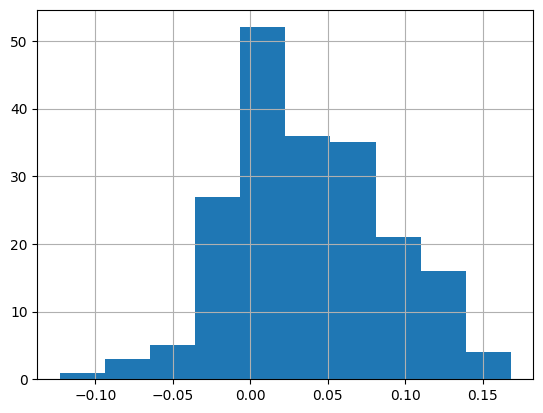

In [55]:
data_sa['polarity_score'].hist()

In [527]:

frame1['polarity_score'] = frame1['Text'].apply(get_polarity)
frame2['polarity_score'] = frame2['Text'].apply(get_polarity)

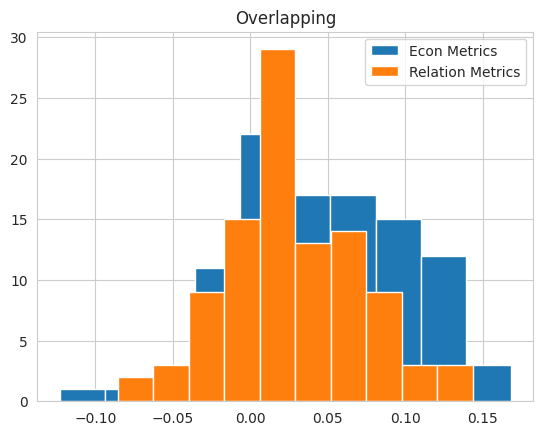

In [528]:

plt.hist(frame1['polarity_score'],
         label='Econ Metrics')

plt.hist(frame2['polarity_score'],
         label='Relation Metrics')

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

<BarContainer object of 2 artists>

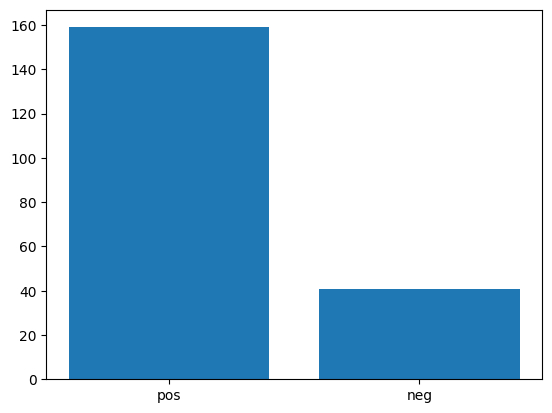

In [56]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

data_sa['polarity']=data_sa['polarity_score'].map(lambda x: sentiment(x))

plt.bar(data_sa.polarity.value_counts().index,data_sa.polarity.value_counts())

In [530]:
frame1['polarity']=frame1['polarity_score'].map(lambda x: sentiment(x))
frame2['polarity']=frame2['polarity_score'].map(lambda x: sentiment(x))


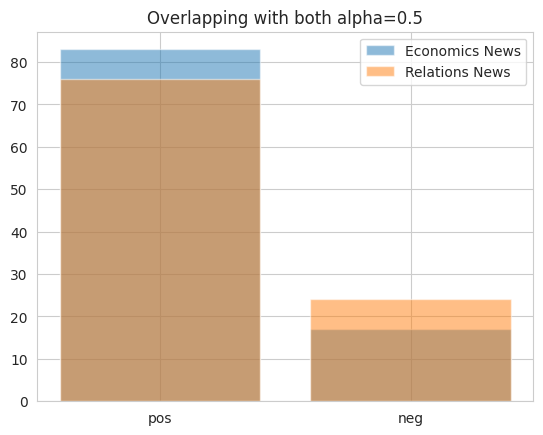

In [531]:
plt.bar(frame1.polarity.value_counts().index,frame1.polarity.value_counts(),
        alpha=0.5, # the transaparency parameter
        label='Economics News')
plt.bar(frame2.polarity.value_counts().index,frame2.polarity.value_counts(),
         alpha=0.5, # the transaparency parameter
        label='Relations News')


plt.legend(loc='upper right')
plt.title('Overlapping with both alpha=0.5')
plt.show()


In [532]:
frame1['sentiment'] = frame1['Text'].apply(lambda speech: TextBlob(speech).sentiment.polarity)
frame2['sentiment'] = frame2['Text'].apply(lambda speech: TextBlob(speech).sentiment.polarity)

In [501]:
import datetime


In [511]:
#econdata[['Date']] = econdata[['Date']].apply(pd.to_datetime)
relationsdata[['Date']] = relationsdata[['Date']].apply(pd.to_datetime)


In [ ]:
data_sa[data_sa['polarity']=='neg']['Text'].head()

17    federal rescue failed banksâ month drawn criti...
20    tenghui president taiwan traveled visit mater ...
21    commerce secretary raimondo wednesday warned c...
22    black seabound vessels clustered waters istanb...
29    banks asset managers scrutiny congress accordi...
Name: Text, dtype: object

In [60]:
import matplotlib.dates as dates
data_sa['sentiment'] = data_sa['Text'].apply(lambda speech: TextBlob(speech).sentiment.polarity)


In [512]:
#econdata[['Date']]
#econdata['Date'] = econdata['Date'].dt.strftime('%m/%d/%y')
#econdata[['Date']] = econdata[['Date']].astype('datetime
relationsdata['Date'] = relationsdata['Date'].dt.strftime('%m/%d/%y')

In [ ]:
#timedata1 = econdata['Date'].sort_values(ascending=True).reset_index
#timedata2 = relationsdata['Date'].sort_values(ascending=True).reset_index
frame1

In [67]:
#frame1 = frame1.sort_values(by='Date')
data_sa = data_sa.sort_values(by='Date')


In [74]:
data_sa

Doc Name                                               Text      Date  Unempl  polarity_score polarity  sentiment
0     Link67.docx  growth slowed fifth consecutive month december...  01/06/23     3.9       -0.028943      neg  -0.028943
1    Link106.docx  domestic intelligence chief thomas haldenwang ...  01/17/23     3.9        0.078881      pos   0.078881
2    Link192.docx  china officiallyâ recordedâ slight population ...  01/18/23     3.9        0.054330      pos   0.054330
3      Link5.docx  america limit setting bitter fiscal fight wash...  01/19/23     3.9        0.103784      pos   0.103784
4     Link66.docx  investors federal reserve officials interest r...  01/21/23     3.9        0.011667      pos   0.011667
5     Link65.docx  banks asset managers scrutiny congress accordi...  01/28/23     3.9       -0.024359      neg  -0.024359
6    Link116.docx  rancourâ china america recent weeks fears taiw...  01/29/23     3.9        0.032986      pos   0.032986
7     Link64.docx  federal reserve signal press ahead campaign in...  01/30/23     3.9        0.024921      pos   0.024921
8    Link143.docx  warning president aggressive diplomatic outrea...  01/30/23     3.9        0.058585      pos   0.058585
9    Link141.docx  conflict china united states could years accor...  01/30/23     3.9        0.014354      pos   0.014354
10   Link188.docx  secretary state antony blinken lands china wee...  02/01/23     3.9        0.034388      pos   0.034388
11   Link189.docx  united states china spent several years billio...  02/02/23     3.9       -0.062109      neg  -0.062109
12    Link63.docx  stocks gained second straight traders dovish s...  02/03/23     3.9        0.023970      pos   0.023970
13   Link187.docx  movement loves outside politics pacific games ...  02/03/23     3.9        0.079781      pos   0.079781
14   Link149.docx  china accused united states fighter shoot susp...  02/05/23     3.9        0.032162      pos   0.032162
15    Link62.docx  unhedged feeling confused economy firing cylin...  02/05/23     3.9        0.111800      pos   0.111800
16   Link148.docx  months china united states tried mostly failed...  02/07/23     3.9       -0.034605      neg  -0.034605
17    Link60.docx  president biden warned protect china threatens...  02/07/23     3.9        0.111833      pos   0.111833
18    Link57.docx  federal reserve chair powell warned central mi...  02/07/23     3.9        0.112564      pos   0.112564
19    Link59.docx  learn monetarists happened prices pandemic str...  02/07/23     3.9        0.117577      pos   0.117577
20    Link58.docx  equities wednesday investors turned cautious c...  02/08/23     3.9        0.014476      pos   0.014476
21    Link47.docx  economists investors clear narrative coming fe...  02/09/23     3.9        0.076548      pos   0.076548
22     Link4.docx  economists investors clear narrative coming fe...  02/09/23     3.9        0.093596      pos   0.093596
24   Link190.docx  barack obama jinping casually strolled around ...  02/15/23     3.9        0.010056      pos   0.010056
23     Link3.docx  treasury ability continue paying bills prevent...  02/15/23     3.9       -0.004167      neg  -0.004167
25     Link1.docx  federal reserve officials believed needed econ...  02/22/23     3.9        0.039263      pos   0.039263
26   Link146.docx  ahead first anniversary invasion ukraine china...  02/22/23     3.9        0.084848      pos   0.084848
27     Link2.docx  washington united states faces default sometim...  02/22/23     3.9        0.022449      pos   0.022449
28   Link186.docx  presidential campaign vowed advance united not...  02/28/23     3.9        0.004268      pos   0.004268
29   Link112.docx  mining indaba largest mining conference dream ...  02/28/23     3.9        0.090948      pos   0.090948
30   Link184.docx  began global south seemed spotlight ukraineâ w...  03/06/23     3.6        0.024073      pos   0.024073
31   Link109.docx  facesâ smeared green black stinger antiaircraf...  03/

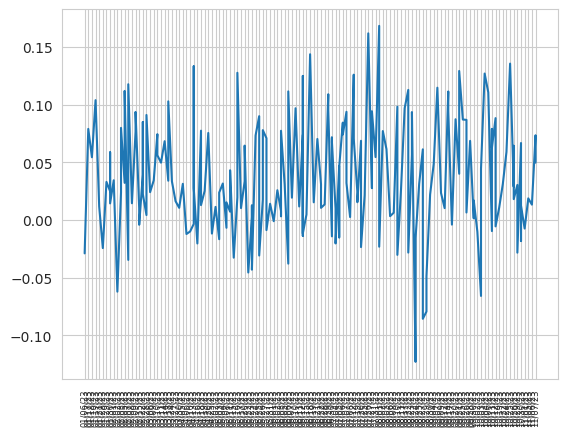

In [83]:
plt.plot(data_sa['Date'], data_sa['sentiment'])
plt.xticks(rotation=90, fontsize=6)

plt.show()

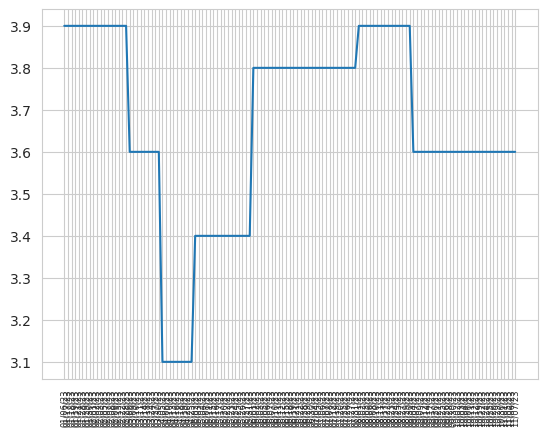

In [85]:
plt.plot(data_sa['Date'], data_sa['Unempl'])
plt.xticks(rotation=90, fontsize=6)

plt.show()

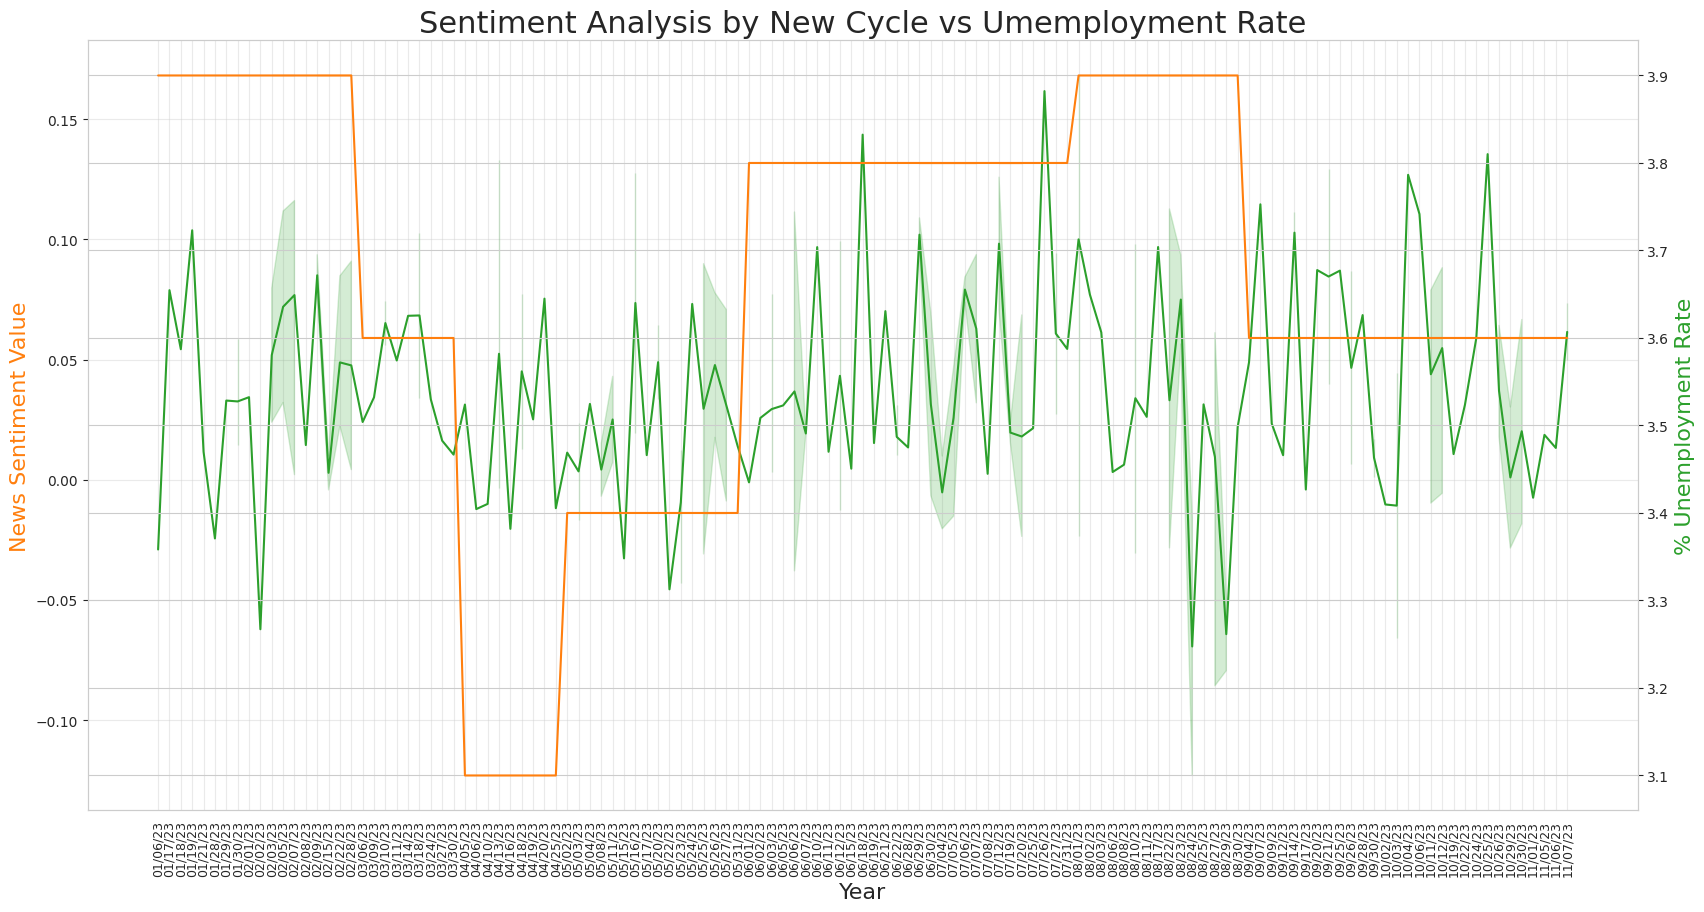

In [92]:
 #Create combo chart
fig, ax1 = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90, fontsize=9)

# Plot 1 creation
ax1.set_title('Sentiment Analysis by New Cycle vs Umemployment Rate', fontsize=22)

ax2 = sns.lineplot(x='Date', y='sentiment', data = data_sa, color='tab:green')
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('News Sentiment Value', fontsize=16, color='tab:orange')
ax1.tick_params(axis='y')

ax1.grid(alpha=.4)

# Specify to share the same x-axis
ax2 = ax1.twinx()

# Plot 2 creation
ax2 = sns.lineplot(x='Date', y='Unempl', data = data_sa, sort=False, color='tab:orange')
ax2.set_ylabel('% Unemployment Rate', fontsize=16, color='tab:green')
ax2.tick_params(axis='y')


#show plot
plt.show()

In [ ]:
###############################################################################
### Classification using various RF Model
###############################################################################
model_RF=RandomForestClassifier()


#TFIDF
Y=clusters
X=TFIDF_matrix

#cross validation
cv_score=cross_val_score(model_RF, X,Y, cv=2)

#mean CV score
np.mean(cv_score)


#Doc2Vec
Y=clusters_d2v
X=doc2vec_k_means

#cross validation
cv_score=cross_val_score(model_RF, X,Y, cv=2)

#mean CV score
np.mean(cv_score)

0.36

In [99]:
###############################################################################
###  LDA Code
###############################################################################

#LDA using bag of words
dictionary = corpora.Dictionary(processed_text)
corpus = [dictionary.doc2bow(doc) for doc in processed_text]

ldamodel = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=100, dtype=np.float32)

#ldamodel = LdaMulticore(corpus, num_topics=3, id2word=dictionary, passes=7, workers=8)

for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


#LDA using TFIDF
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
ldamodel = LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=7, workers=8)

for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.012*"china" + 0.011*"beijing" + 0.010*"chinese" + 0.007*"recent" + 0.006*"efforts" + 0.005*"senior" + 0.005*"security" + 0.005*"kirby" + 0.004*"officials" + 0.004*"could"
Topic: 1 
Words: 0.009*"banks" + 0.009*"china" + 0.007*"chinese" + 0.005*"could" + 0.005*"financial" + 0.004*"companies" + 0.004*"officials" + 0.004*"global" + 0.004*"states" + 0.004*"government"
Topic: 2 
Words: 0.009*"rules" + 0.007*"deficits" + 0.007*"governments" + 0.007*"government" + 0.007*"pandemic" + 0.007*"spending" + 0.006*"would" + 0.006*"prices" + 0.005*"growth" + 0.005*"student"
Topic: 3 
Words: 0.021*"chinese" + 0.014*"china" + 0.005*"military" + 0.005*"would" + 0.005*"austin" + 0.004*"officials" + 0.004*"taiwan" + 0.004*"years" + 0.004*"money" + 0.004*"recent"
Topic: 4 
Words: 0.016*"inflation" + 0.012*"prices" + 0.009*"china" + 0.006*"month" + 0.006*"report" + 0.006*"costs" + 0.006*"labor" + 0.005*"rates" + 0.005*"months" + 0.005*"spending"
Topic: 5 
Words: 0.007*"china" + 0.006*"cou